
# Ciência dos Dados - PROJETO 1

## David Fogelman


## Objetivo
O meu objetivo do projeto é definir a relção da escolaridade com o acesso da internet e a renda

## Como a renda e o grau de escolaridade influenciam no acesso á internet no estado de São Paulo para uma população abaixo de 72 anos?

https://tecnologia.uol.com.br/noticias/redacao/2015/04/29/ibge-renda-e-escolaridade-tem-relacao-direta-com-acesso-a-internet.htm

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline



print('Esperamos trabalhar no diretório')
print(os.getcwd())
print("ok")

Esperamos trabalhar no diretório
E:\Semestre 2\Ciência dos Dados\Projetos\InsperEng-CD
ok


In [162]:
dados = pd.read_csv('Dados_selecionados.csv')

lista = ["UF", "V8005", "V06111", "V4750", "V4745"]
dados = dados.loc[:,lista]

In [169]:
dados_not_null = dados[pd.notnull(dados.UF)&pd.notnull(dados.V8005)&pd.notnull(dados.V06111)&pd.notnull(dados.V4750)&pd.notnull(dados.V4745)]
dados_not_null = dados_not_null[dados.V4750!=999999999999] # tirando rendas inválidas

dados_not_null = dados_not_null[dados.V4745!=8] # tirando ensinos inderteminados
# dados_not_null = dados_not_null[dados.UF==35] # tirando outros estados além de SP
dados = dados_not_null

dados.V06111 = dados.V06111.astype('category')
dados.V06111.cat.categories = (['Sim', 'Não'])
dados.V4745 = dados.V4745.astype('category')
dados.V4745.cat.categories = (['Sem instrução','Fundamental incompleto ou equivalente','Fundamental completo ou equivalente','Médio incompleto ou equivalente','Médio completo ou equivalente','Superior incompleto ou equivalente','Superior completo' ])

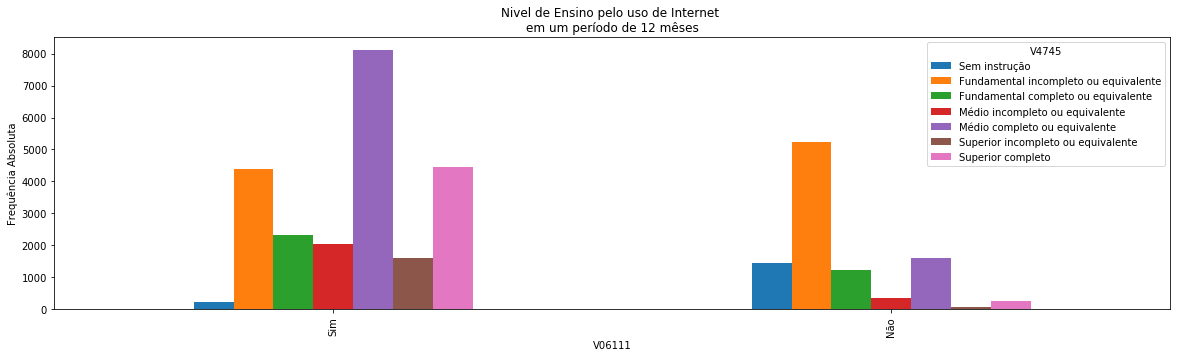

In [170]:
ct1 = pd.crosstab(dados.V06111, dados.V4745)
ct1.plot(kind='bar', figsize=(20, 5))
# color=('red','blue','green','yellow', 'salmon'),
plt.ylabel('Frequência Absoluta')
plt.title("Nivel de Ensino pelo uso de Internet \nem um período de 12 mêses")

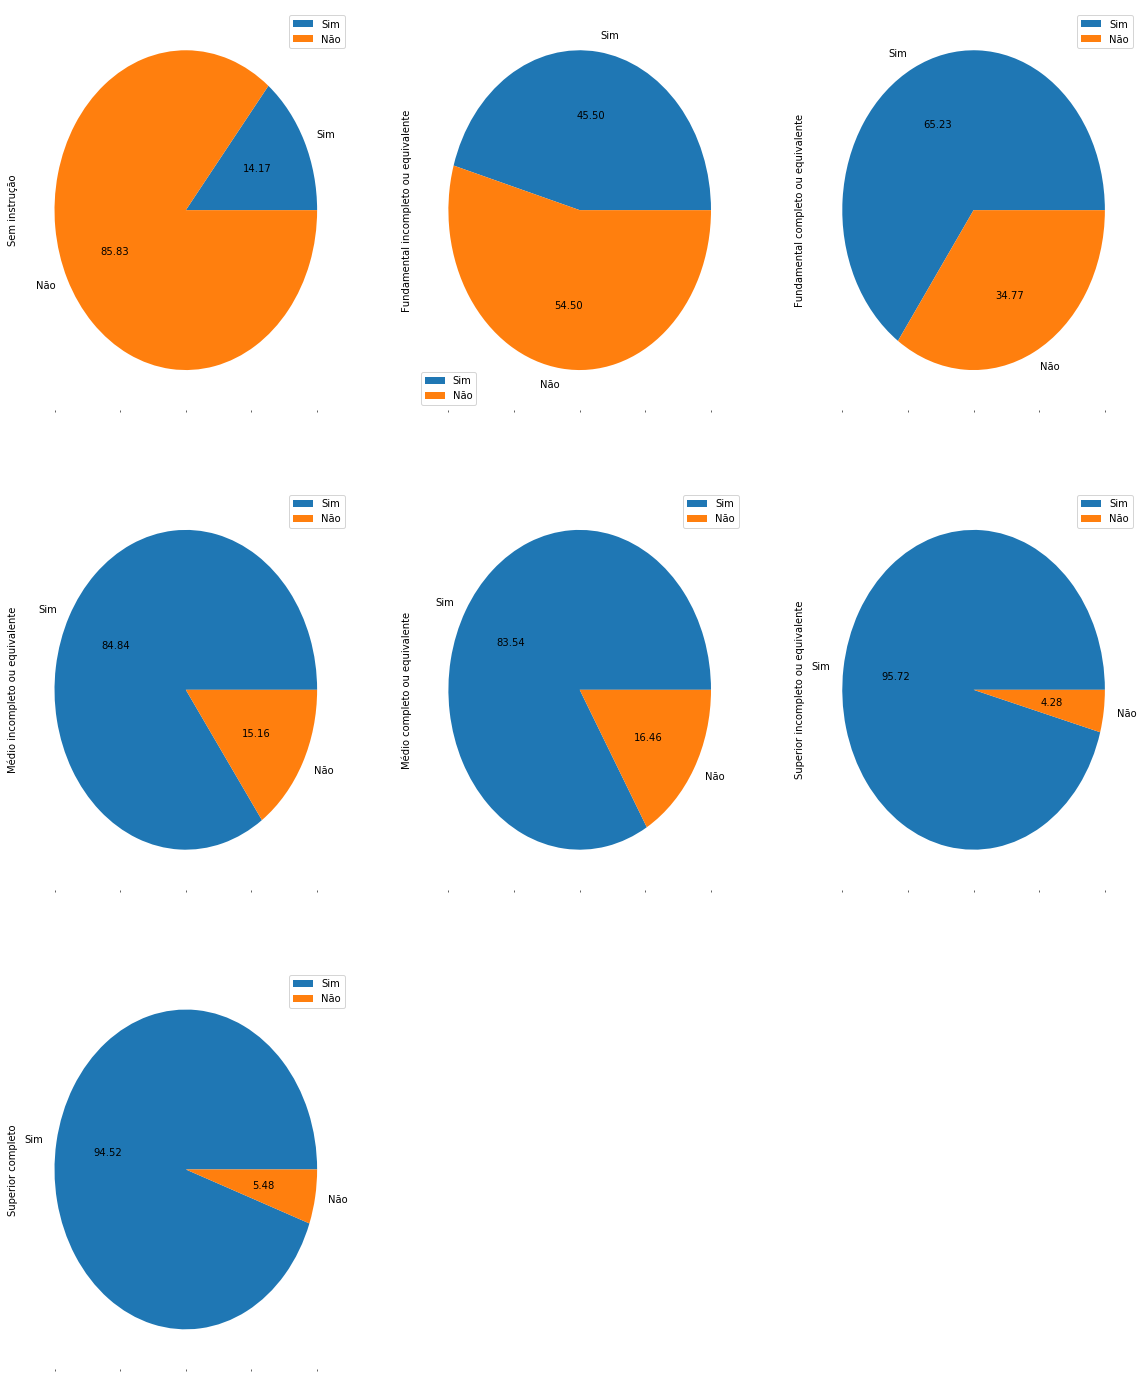

In [171]:
ct1 = pd.crosstab(dados.V06111, dados.V4745)
ct1.plot(kind='pie',subplots = True,figsize=(20, 25),layout=(3, 3),autopct="%0.2f")
# plt.ylabel('Frequência Absoluta')

plt.title("Nivel de Ensino pelo uso de Internet \nem um período de 12 mêses")

In [172]:
# # dados.V4750.describe()
# # bp = dados.V4750.boxplot()
# plot = dados.V4750.plot(kind='box',title='Expectativa de vida de países do mundo')#, color='red')
# plt.ylabel('(em anos)')
# plt.xlabel('Ano')

[]

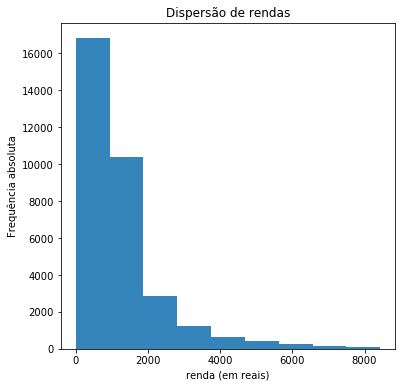

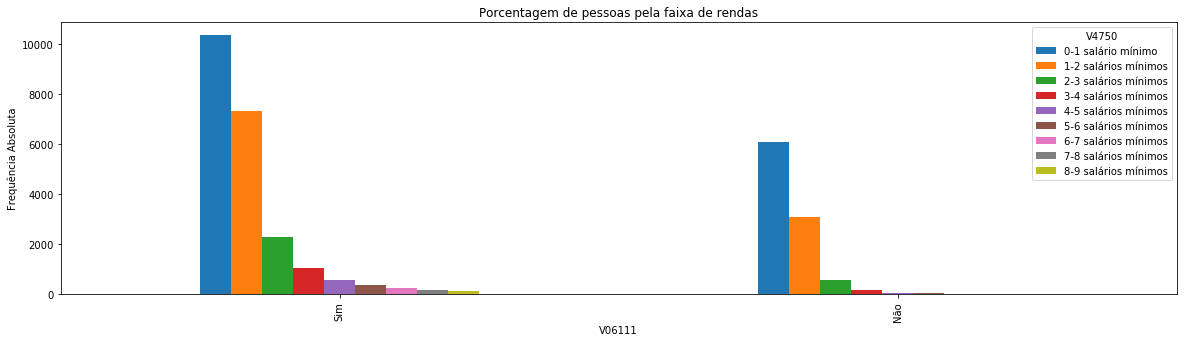

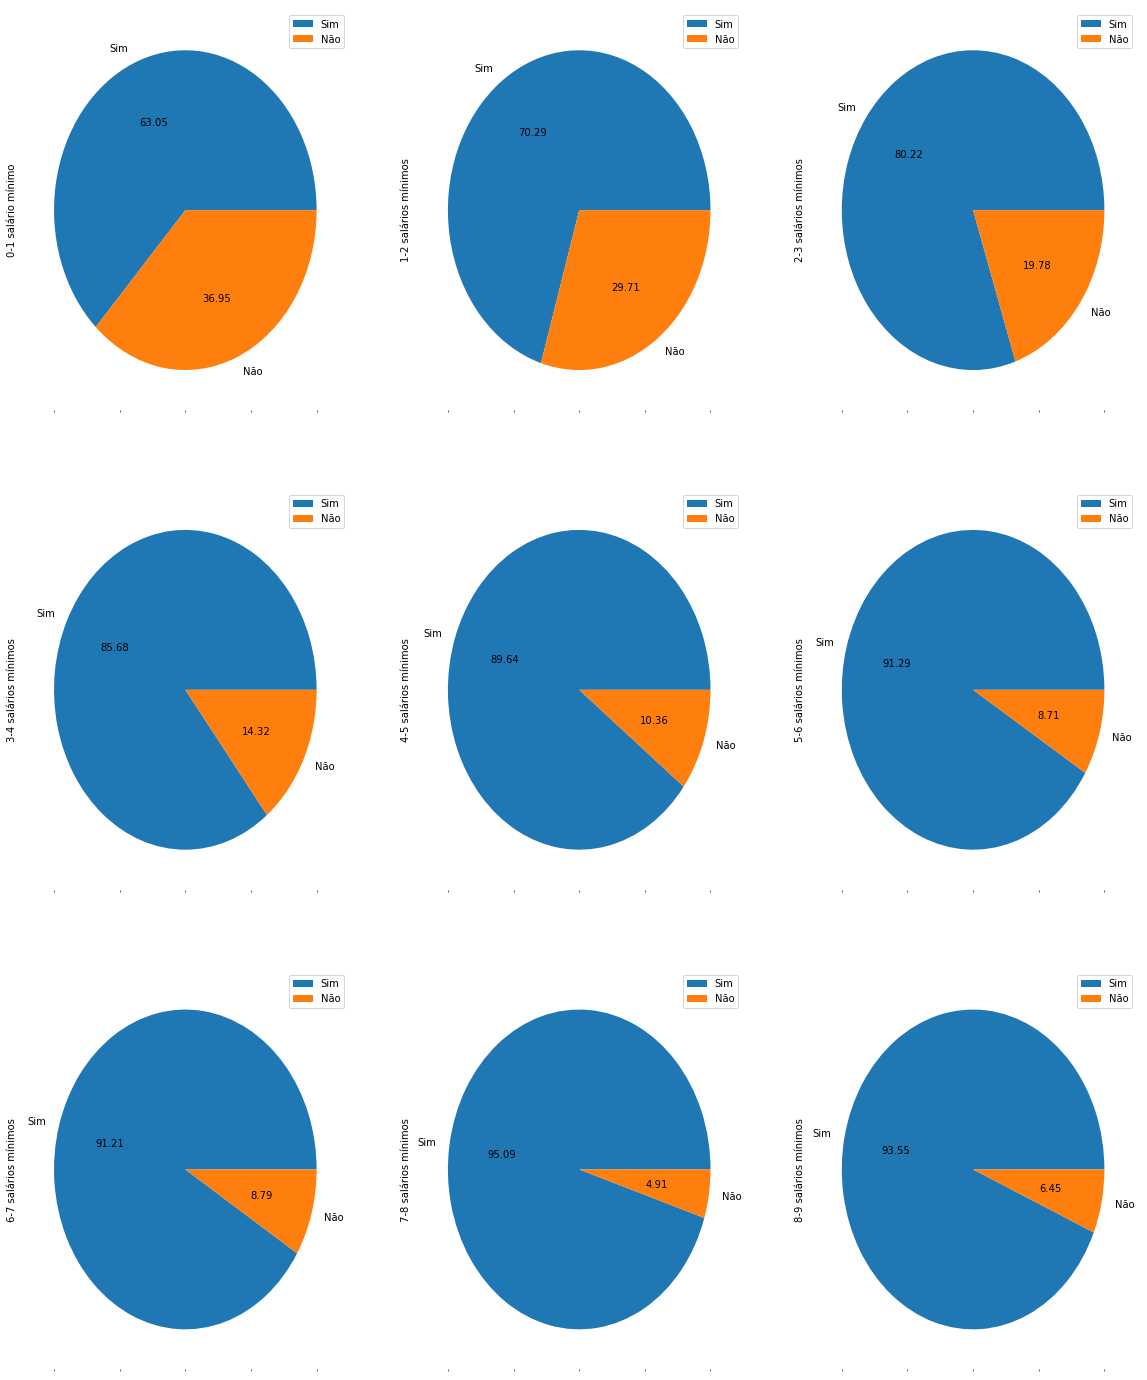

In [173]:
faixa = range(0,9370,937) # em salários mínimos

RENDA_cat = pd.cut(dados.V4750, bins=faixa)
RENDA_cat.value_counts(sort=False, normalize=True)/100

RENDA_cat = RENDA_cat.astype('category')
RENDA_cat = RENDA_cat[pd.notnull(RENDA_cat)]

# print(RENDA_cat)
RENDA_cat.cat.categories = (["0-1 salário mínimo","1-2 salários mínimos","2-3 salários mínimos","3-4 salários mínimos","4-5 salários mínimos",
"5-6 salários mínimos","6-7 salários mínimos","7-8 salários mínimos","8-9 salários mínimos"])
# ----------------------

plot = dados.V4750.plot.hist(bins=faixa,title='Dispersão de rendas', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')
plt.plot()



ct1 = pd.crosstab(dados.V06111, RENDA_cat)
ct1.plot(kind='bar',figsize=(20, 5))
plt.ylabel('Frequência Absoluta')
plt.title("Número absoluto de pessoas pela faixa de rendas")
plt.plot()

# print(RENDA_cat)
plt.title("Porcentagem de pessoas pela faixa de rendas")
ct1 = pd.crosstab(dados.V06111,RENDA_cat)
ct1.plot(kind='pie',figsize=(20, 25),subplots=True,layout=(3, 3),autopct="%.2f")
# plt.ylabel('Frequência Absoluta')
plt.plot()

In [174]:
pd.crosstab([dados.V06111, dados.V4745],RENDA_cat,  margins=True)

V4750                                         0-1 salário mínimo  \
V06111 V4745                                                       
Sim    Sem instrução                                         145   
       Fundamental incompleto ou equivalente                2746   
       Fundamental completo ou equivalente                  1375   
       Médio incompleto ou equivalente                      1291   
       Médio completo ou equivalente                        3809   
       Superior incompleto ou equivalente                    470   
       Superior completo                                     520   
Não    Sem instrução                                         997   
       Fundamental incompleto ou equivalente                3197   
       Fundamental completo ou equivalente                   695   
       Médio incompleto ou equivalente                       243   
       Médio completo ou equivalente                         847   
       Superior incompleto ou equivalente                     31   
       Superior completo                                      59   
All                                                        16425   

V4750                                         1-2 salários mínimos  \
V06111 V4745                                                         
Sim    Sem instrução                                            63   
       Fundamental incompleto ou equivalente                  1195   
       Fundamental completo ou equivalente                     720   
       Médio incompleto ou equivalente                         530   
       Médio completo ou equivalente                          2983   
       Superior incompleto ou equivalente                      596   
       Superior completo                                      1230   
Não    Sem instrução                                           377   
       Fundamental incompleto ou equivalente                  1616   
       Fundamental completo ou equivalente                     402   
       Médio incompleto ou equivalente                          92   
       Médio completo ou equivalente                           503   
       Superior incompleto ou equivalente                       25   
       Superior completo                                        77   
All                                                          10409   

V4750                                         2-3 salários mínimos  \
V06111 V4745                                                         
Sim    Sem instrução                                            13   
       Fundamental incompleto ou equivalente                   233   
       Fundamental completo ou equivalente                     123   
       Médio incompleto ou equivalente                         111   
       Médio completo ou equivalente                           685   
       Superior incompleto ou equivalente                      241   
       Superior completo                                       878   
Não    Sem instrução                                            32   
       Fundamental incompleto ou equivalente                   265   
       Fundamental completo ou equivalente                      76   
       Médio incompleto ou equivalente                           8   
       Médio completo ou equivalente                           129   
       Superior incompleto ou equivalente                        7   
       Superior completo                                        46   
All                                                           2847   

V4750                                         3-4 salários mínimos  \
V06111 V4745                                                         
Sim    Sem instrução                                             1   
       Fundamental incompleto ou equivalente                    75   
       Fundamental completo ou equivalente                      28   
       Médio incompleto ou equivalente                          26   
       Médio completo ou equivalente     